### Intro to Linear Combinations, Independence, Change of Basis & PCA  

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dbp = np.array([78,80,81,82,84,86])
sbp = np.array([126,128,127,130,130,132])
health_index = np.array([0.6,0.8,0.7,0.9,0.94,0.98])
df = pd.DataFrame({"Diastolic BP":dbp, "Systolic BP":sbp, "Health Index": health_index})
df.head(10)

,Diastolic BP,Systolic BP,Health Index
0,78,126,0.60
1,80,128,0.80
2,81,127,0.70
3,82,130,0.90
4,84,130,0.94
5,86,132,0.98


In [ ]:
df_features = df[["Diastolic BP", "Systolic BP"]]
df_features

,Diastolic BP,Systolic BP
0,78,126
1,80,128
2,81,127
3,82,130
4,84,130
5,86,132


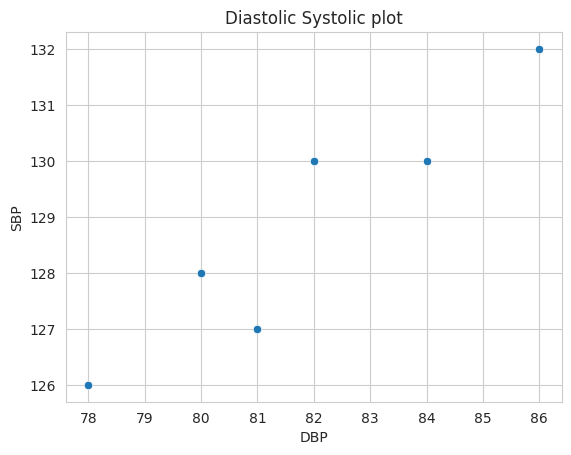

In [ ]:
sns.set_style(style='whitegrid')

sp = sns.scatterplot(x=df["Diastolic BP"], y=df["Systolic BP"])
sp.set(xlabel ="DBP", ylabel = "SBP", title ='Diastolic Systolic plot')

plt.show()

**Activity: Calculate the variance of DBP and SBP**   

In [ ]:
df_features.var()

Diastolic BP    8.166667
Systolic BP     4.966667
dtype: float64

**Activity: Create a synthetic feature as linear combination of DBP and SBP**

1. Use beta1 = 0.8, beta2=0.6

In [ ]:
beta1 = 0.8
beta2 = 0.6
syn_feature1 = beta2 * df_features['Systolic BP'] + beta1 * df_features['Diastolic BP']
syn_feature1

0    138.0
1    140.8
2    141.0
3    143.6
4    145.2
5    148.0
dtype: float64

**Activity: Write the above linear combination as Matrix vector product**

In [ ]:
beta = np.array([beta1 , beta2])
x = df_features.to_numpy()
np.matmul(x, beta)

array([138. , 140.8, 141. , 143.6, 145.2, 148. ])

**Activity: Create a new dataframe with synthetic feature column added and calculate variance of each column**

In [ ]:
df_features['syn_feature'] = syn_feature1
df_features.head()
print(df_features.var())

Diastolic BP     8.166667
Systolic BP      4.966667
syn_feature     12.742667
dtype: float64


**Activity: How much of total variance is explained by synthetic feature**

Code this

In [ ]:
explained_var = df_features["syn_feature"].var()
total_var = df_features['Diastolic BP'].var() + df_features['Systolic BP'].var()
(explained_var / total_var) * 100

97.0253807106598

**Activity: Add new synthetic features with different betas**

1. Create a new dataframe with features
2. Add synthetic feature as before (beta1=0.8, beta=0.6)
3. Add synthetic features for different betas
4. beta1=0.6, 0.98, 0.2, beta2=0.8, 0.2, 0.98 for DBP and SBP resepctively

In [ ]:
beta1 , beta2 = 0.6, 0.8
syn_feature2 = beta2 * df_features['Systolic BP'] + beta1 * df_features['Diastolic BP']
beta1 , beta2 = 0.98, 0.2
syn_feature3 = beta2 * df_features['Systolic BP'] + beta1 * df_features['Diastolic BP']
beta1 , beta2 = 0.2, 0.98
syn_feature4 = beta2 * df_features['Systolic BP'] + beta1 * df_features['Diastolic BP']

In [ ]:
df_new = pd.DataFrame({'syn_feature2':syn_feature2,'syn_feature3':syn_feature3, 'syn_feature4':syn_feature4 })
df_new.head()

,syn_feature2,syn_feature3,syn_feature4
0,147.6,101.64,139.08
1,150.4,104.00,141.44
2,150.2,104.78,140.66
3,153.2,106.36,143.80
4,154.4,108.32,144.20


In [ ]:
df_features.drop('syn_feature',axis=1, inplace=True)

<ipython-input-33-c62c7b2cba0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.drop('syn_feature',axis=1, inplace=True)


In [ ]:
cov_mat = df_features.cov()

# Watch out. If you are using numpy for calculating covariance matrix,
# then you have to first take a transpose data matrix
# It is pretty wierd. But it is what it is. :-(
# cov_mat = np.cov(df_features.to_numpy().T)

cov_mat

,Diastolic BP,Systolic BP,syn_feature
Diastolic BP,8.166667,5.966667,10.113333
Systolic BP,5.966667,4.966667,7.753333
syn_feature,10.113333,7.753333,12.742667


In [ ]:
correl_mat = df_features.corr()
correl_mat

,Diastolic BP,Systolic BP,syn_feature
Diastolic BP,1.000000,0.936865,0.991384
Systolic BP,0.936865,1.000000,0.974599
syn_feature,0.991384,0.974599,1.000000


In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [ ]:
eigen_vals

array([2.54867786e+01, 3.89221414e-01, 1.43512212e-15])

In [ ]:
eigen_vecs

array([[-0.56111603, -0.60427543, -0.56568542],
       [-0.43032266,  0.79675744, -0.42426407],
       [-0.70708642, -0.00536588,  0.70710678]])

In [ ]:
eigen_vecs[0] #this is not eigen vec 1

array([-0.56111603, -0.60427543, -0.56568542])

In [ ]:
eigen_vecs[:, 0] # this is eigen vec 1

array([-0.56111603, -0.43032266, -0.70708642])

In [ ]:
X = df_features.to_numpy()
v1 = eigen_vecs[:, 0]
v2 = eigen_vecs[:, 1]

**Matrix-Vector multiplication as vector of projections**

In [ ]:
X

array([[ 78. , 126. , 138. ],
       [ 80. , 128. , 140.8],
       [ 81. , 127. , 141. ],
       [ 82. , 130. , 143.6],
       [ 84. , 130. , 145.2],
       [ 86. , 132. , 148. ]])

In [ ]:
# Xv1 gives PC1
# It gives the vector formed whose individual entries are
# projection of individual records onto the direction of v1
PC1 = np.matmul(X, v1)
PC1

array([-195.56563151, -199.52835087, -199.80056154, -203.49107023,
       -205.74464058, -209.70735994])

In [ ]:
# Xv2 gives PC2
# It gives the vector formed whose individual entries are
# projection of individual records onto the direction of v2
PC2 = np.matmul(X, v2)
PC2

array([52.51746159, 52.88740113, 51.48529508, 53.25734067, 52.04020439,
       52.41014394])

**Viewing Vx1 (Multiplying a record vector with Eigen matrix) as change of basis**

In [ ]:
# Make Eigen Matrix
V = np.array([v1, v2])
V

array([[-0.56111603, -0.43032266, -0.70708642],
       [-0.60427543,  0.79675744, -0.00536588]])

In [ ]:
val_in_std_basis = X[0,:]
print(f"val_in_std_basis= {val_in_std_basis}")

val_in_eigen_basis = np.matmul(V, val_in_std_basis)
print(f"val_in_eigen_basis= {val_in_eigen_basis}")

val_in_std_basis= [ 78. 126. 138.]
val_in_eigen_basis= [-195.56563151   52.51746159]


**Summary**

Matrix Vector product can be viewed in 4-5 ways from a ML and data science perspective.
1. Projection of the dataset record onto a vector
2. Linear combination of features
3. Change of basis: What are the new coordinates of a record vector when viewed from a new basis (This could be Eigen basis or any other basis)
4. Matrix is a linear transformation applied to vector (And a special case is Eigen vector transformation)

There are 2-3+ more ways of looking at it (in future)
1. Row picture
2. Reduced dimension linear combination of archetype
3. Spectral addition over low rank matrices

**Dot product of vectors**
$$
    a^Tb = \|a\| \|b\| cos\theta
$$

In [ ]:
# Dot product of standard unit vectors e1 and e2
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
np.dot(e1, e2)

0

In [ ]:
# Dot products of eigen vectors
np.dot(v1, v2)

0.0

### Gram Schmidt

In [ ]:
import numpy as np

In [ ]:
vectors=np.array([[0,0,4], [0,1,1], [1,1,1]])

In [ ]:
q1=vectors[0]
q1_normalized= q1/np.linalg.norm(q1)
q1_normalized

array([0., 0., 1.])

In [ ]:
basis=[]
basis.append(q1_normalized)
q2=vectors[1] - np.dot(q1_normalized, vectors[1]) * q1_normalized
q2

array([0., 1., 0.])

In [ ]:
if np.linalg.norm(q2) < 1e-7:
    print('q2 is dep of q1')
else:
    q2_normalized= q2/np.linalg.norm(q2)
    basis.append(q2_normalized)
    q2_normalized
basis

[array([0., 0., 1.]), array([0., 1., 0.])]

In [ ]:
q3= vectors[2] - np.dot(q1_normalized, vectors[2]) * q1_normalized -np.dot(q2_normalized, vectors[2]) * q2_normalized

if np.linalg.norm(q3) < 1e-7:
    print('q3 is dep of q1 and q2')
else:
    q3_normalized= q3/np.linalg.norm(q3)
    basis.append(q3_normalized)
    q3_normalized

In [ ]:
basis

[array([0., 0., 1.]), array([0., 1., 0.]), array([1., 0., 0.])]

In [ ]:
def gram_schmidt(vectors):
    basis=[]

    for ai in vectors:
        q_new = ai - np.sum( np.dot(ai,qj) * qj for qj in basis)
        norm = np.linalg.norm(q_new)
        if(norm>1e-10):
            basis.append(q_new/norm)
        else:
            raise Exception("Gram-Schmidt process failed due to near-zero vector norm")
    return np.array(basis)

In [ ]:
gram_schmidt(vectors)

<ipython-input-38-e850dd053384>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  q_new = ai - np.sum( np.dot(ai,qj) * qj for qj in basis)


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])